<a href="https://colab.research.google.com/github/Aryan-R/P8_Kaggle_nov/blob/main/P8_02_FE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0,'/content/drive/MyDrive/P8')
from my_functions import *

In [ ]:
train= pd.read_csv('/content/drive/MyDrive/P8/train.csv', index_col='id')
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,2.099590,0.012330,1.607190,-0.318058,0.560137,2.806880,1.351140,2.535930,0.197527,0.676494,1.989790,-3.842450,0.037380,0.230322,3.33055,0.009397,0.144738,3.051310,1.303620,0.033225,-0.018284,2.748210,-0.009294,-0.036271,-0.049871,0.019484,3.898460,11.28630,1.138020,3.366880,4.94446,-0.105772,...,-0.027551,0.019483,-0.048826,0.050748,3.729300,5.017440,4.186880,0.063342,0.121043,1.37175,4.017450,0.167613,0.039754,2.042360,-0.016614,0.107679,3.507250,0.013660,-0.097023,5.396070,0.244457,3.49184,0.113090,-0.015472,4.208790,4.106560,0.037227,-0.118814,0.067086,0.010739,1.098620,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,4.545940,0.037706,0.331749,0.325091,0.062040,2.262150,4.339430,-0.224999,0.233586,3.381280,1.902990,0.067874,-0.051268,0.006135,2.60444,0.103441,0.067638,4.753620,1.855520,-0.181834,0.008359,3.166340,0.011850,0.022292,0.069320,0.117109,0.315276,24.48070,1.672270,-0.409067,4.95475,0.092358,...,-0.010841,0.064584,0.102548,0.093611,0.964089,0.630422,4.307340,0.091289,-0.036360,3.61767,3.103240,0.000657,0.051302,1.924620,0.123294,-0.022671,1.548120,-0.010397,0.058330,3.661310,-0.118386,2.35739,-0.009112,0.178701,4.097350,3.532890,0.005244,0.121381,0.109968,0.135838,3.460170,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,1.801870,0.056995,0.328684,2.968810,0.105244,2.069490,5.309860,1.354790,-0.262018,1.379080,1.480910,0.020542,-0.008806,0.109348,1.68365,0.038180,0.123716,1.112480,3.571660,0.120601,0.082069,2.233520,0.002270,0.045182,0.014405,0.011599,-0.502849,33.73820,1.417500,1.071350,3.22296,2.122030,...,0.027571,-0.007121,-0.048914,-0.002574,1.865090,2.404170,0.411741,0.057749,0.525174,2.16879,0.828297,0.089848,0.093744,4.949010,-0.010978,0.076671,0.266784,0.038691,0.382731,3.847600,-0.121482,3.74084,0.147098,-0.016566,0.614651,2.125840,0.078828,0.979808,0.026758,0.117310,4.883000,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.141120,0.124464,0.148209,0
3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,4.503320,0.123494,1.002680,4.869600,0.058411,2.497850,1.238430,2.348360,0.175475,1.608890,2.028810,0.042086,0.005141,0.076506,1.65122,0.111813,0.121641,0.589120,4.236920,-0.032843,0.058168,0.712927,0.097465,0.072744,0.000324,0.063362,4.063820,25.38240,0.576572,2.026210,2.96843,1.085670,...,0.110884,0.026837,2.931160,0.068112,-0.495192,1.345280,2.242750,0.035611,-0.139274,4.74243,3.292740,0.117877,0.065605,0.556711,-0.058029,0.070501,1.101250,0.068559,0.162928,4.070180,-0.008835,3.89678,0.913739,-0.163204,3.074850,4.356780,-0.048894,4.917990,0.069930,-0.015347,3.474390,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,3.371450,0.034166,0.711483,0.769988,0.057555,0.957257,3.711450,5.464350,0.287104,2.616950,1.384030,0.074883,-0.010543,0.109121,2.27602,0.008023,0.045236,4.359540,5.075620,-0.009376,0.528966,4.053350,0.020000,0.106828,0.051307,0.045939,3.402460,15.56150,1.635960,0.047029,4.01771,0.155748,...,0.075586,0.032114,-0.042284,0.047974,-0.294184,5.065600,1.050290,0.034019,0.024611,3.12578,2.262840,0.082462,-0.023296,5.615850,0.086238,0.157568,3.725670,0.061247,0.086603,0.607246,1.411090,2.06062,-0.023154,0.011234,2.155530,0.914518,0.044521,0.375731,0.134351,0.013781,1.910590,-0.042943,0.105616,0.125072,0.037509,1.043790,

In [ ]:
X= train.drop('target',axis=1)
y= train['target']

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scale = RobustScaler().fit(X)
X_scaled = std_scale.transform(X)

# Feature Selection

Correlation Method :
target    1.000000
f34       0.135270
f55       0.113889
f43       0.109418
f71       0.107687
f80       0.106964
f91       0.106120
f8        0.105724
f27       0.101346
Name: target, dtype: float64

Embedded Method :
Best alpha using built-in LassoCV: 0.000221
Best score using built-in LassoCV: 0.158915
Lasso picked 99 variables and eliminated the other 2 variables


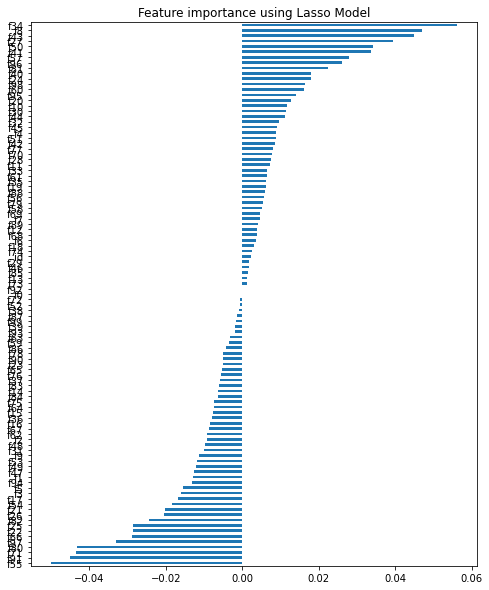

f55   -0.050054
f91   -0.045114
f71   -0.043570
f80   -0.043104
f97   -0.033055
         ...   
f50    0.034171
f27    0.039425
f43    0.044993
f8     0.047054
f34    0.056109
Length: 101, dtype: float64

Méthode RFE (Recursive Feature Elimination):
Optimum number of features: 12
Score with 12 features: 0.111817
Variables selectionnées: 
Index(['f8', 'f27', 'f34', 'f41', 'f43', 'f50', 'f55', 'f71', 'f80', 'f91'], dtype='object')


In [ ]:
feat_select(train, 'target', X.columns, [],thresh=0.1)

## Passage au log

In [ ]:
for e in ['f8', 'f27', 'f34', 'f41', 'f43', 'f50', 'f55', 'f71', 'f80', 'f91']:
    train[e]= train[e].apply(lambda x: np.log(x))

In [ ]:
train

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.106643,3.594370,132.8040,3.184280,0.081971,1.18859,3.732380,2.266270,0.741742,0.012330,1.607190,-0.318058,0.560137,2.806880,1.351140,2.535930,0.197527,0.676494,1.989790,-3.842450,0.037380,0.230322,3.33055,0.009397,0.144738,3.051310,1.303620,-3.404465,-0.018284,2.748210,-0.009294,-0.036271,-0.049871,0.019484,1.360582,11.28630,1.138020,3.366880,4.94446,-0.105772,...,-0.027551,0.019483,-0.048826,0.050748,3.729300,5.017440,4.186880,0.063342,0.121043,1.37175,1.390647,0.167613,0.039754,2.042360,-0.016614,0.107679,3.507250,0.013660,-0.097023,1.685671,0.244457,3.49184,0.113090,-0.015472,4.208790,4.106560,0.037227,-0.118814,0.067086,0.010739,0.094055,0.013331,-0.011715,0.052759,0.065400,4.211250,1.978770,0.085974,0.240496,0
1,0.125021,1.673360,76.5336,3.378250,0.099400,5.09366,1.275620,-0.471318,1.514235,0.037706,0.331749,0.325091,0.062040,2.262150,4.339430,-0.224999,0.233586,3.381280,1.902990,0.067874,-0.051268,0.006135,2.60444,0.103441,0.067638,4.753620,1.855520,NaN,0.008359,3.166340,0.011850,0.022292,0.069320,0.117109,-1.154307,24.48070,1.672270,-0.409067,4.95475,0.092358,...,-0.010841,0.064584,0.102548,0.093611,0.964089,0.630422,4.307340,0.091289,-0.036360,3.61767,1.132447,0.000657,0.051302,1.924620,0.123294,-0.022671,1.548120,-0.010397,0.058330,1.297821,-0.118386,2.35739,-0.009112,0.178701,4.097350,3.532890,0.005244,0.121381,0.109968,0.135838,1.241318,0.017054,0.124863,0.154064,0.606848,-0.267928,2.577860,-0.020877,0.024719,0
2,0.036330,1.497470,233.5460,2.194350,0.026914,3.12694,5.056870,3.849460,0.588825,0.056995,0.328684,2.968810,0.105244,2.069490,5.309860,1.354790,-0.262018,1.379080,1.480910,0.020542,-0.008806,0.109348,1.68365,0.038180,0.123716,1.112480,3.571660,-2.115268,0.082069,2.233520,0.002270,0.045182,0.014405,0.011599,NaN,33.73820,1.417500,1.071350,3.22296,2.122030,...,0.027571,-0.007121,-0.048914,-0.002574,1.865090,2.404170,0.411741,0.057749,0.525174,2.16879,-0.188383,0.089848,0.093744,4.949010,-0.010978,0.076671,0.266784,0.038691,0.382731,1.347450,-0.121482,3.74084,0.147098,-0.016566,0.614651,2.125840,0.078828,0.979808,0.026758,0.117310,1.585760,0.085222,0.032396,0.116092,-0.001689,-0.520069,2.141120,0.124464,0.148209,0
3,-0.014077,0.246000,779.9670,1.890640,0.006948,1.53112,2.698000,4.517330,1.504815,0.123494,1.002680,4.869600,0.058411,2.497850,1.238430,2.348360,0.175475,1.608890,2.028810,0.042086,0.005141,0.076506,1.65122,0.111813,0.121641,0.589120,4.236920,NaN,0.058168,0.712927,0.097465,0.072744,0.000324,0.063362,1.402123,25.38240,0.576572,2.026210,2.96843,1.085670,...,0.110884,0.026837,2.931160,0.068112,-0.495192,1.345280,2.242750,0.035611,-0.139274,4.74243,1.191720,0.117877,0.065605,0.556711,-0.058029,0.070501,1.101250,0.068559,0.162928,1.403687,-0.008835,3.89678,0.913739,-0.163204,3.074850,4.356780,-0.048894,4.917990,0.069930,-0.015347,1.245419,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.968600,0.040017,0.044873,0
4,-0.003259,3.715420,156.1280,2.147720,0.018284,2.09859,4.154920,-0.038236,1.215343,0.034166,0.711483,0.769988,0.057555,0.957257,3.711450,5.464350,0.287104,2.616950,1.384030,0.074883,-0.010543,0.109121,2.27602,0.008023,0.045236,4.359540,5.075620,NaN,0.528966,4.053350,0.020000,0.106828,0.051307,0.045939,1.224499,15.56150,1.635960,0.047029,4.01771,0.155748,...,0.075586,0.032114,-0.042284,0.047974,-0.294184,5.065600,1.050290,0.034019,0.024611,3.12578,0.816621,0.082462,-0.023296,5.615850,0.086238,0.157568,3.725670,0.061247,0.086603,-0.498821,1.411090,2.06062,-0.023154,0.011234,2.155530,0.914518,0.044521,0.375731,0.134351,0.013781,0.647412,-0.042943,0.105616,0.125072,0.037509,1.043790,1.074810,-0.012819,

# KMeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km= KMeans(n_clusters=4)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
pd.DataFrame(km.labels_).value_counts()

1    298685
2    290085
0      6065
3      5165
dtype: int64

# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
names = X.index
features = X.columns
color= [y.values]

In [ ]:
model = PCA(n_components= 2)
model.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

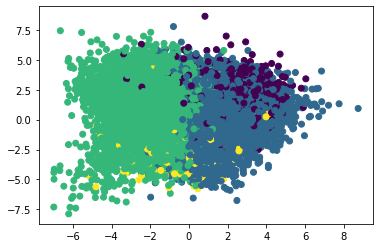

In [ ]:
x_pca= model.transform(X_scaled)

plt.scatter(x_pca[:,0],x_pca[:,1],c=km.labels_)
plt.show()

# Modélisations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

In [ ]:
X_model= pd.DataFrame(X_scaled,index= X.index, columns= X.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y,test_size=0.2, random_state=0)

## Régression Linéaire 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model =  LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

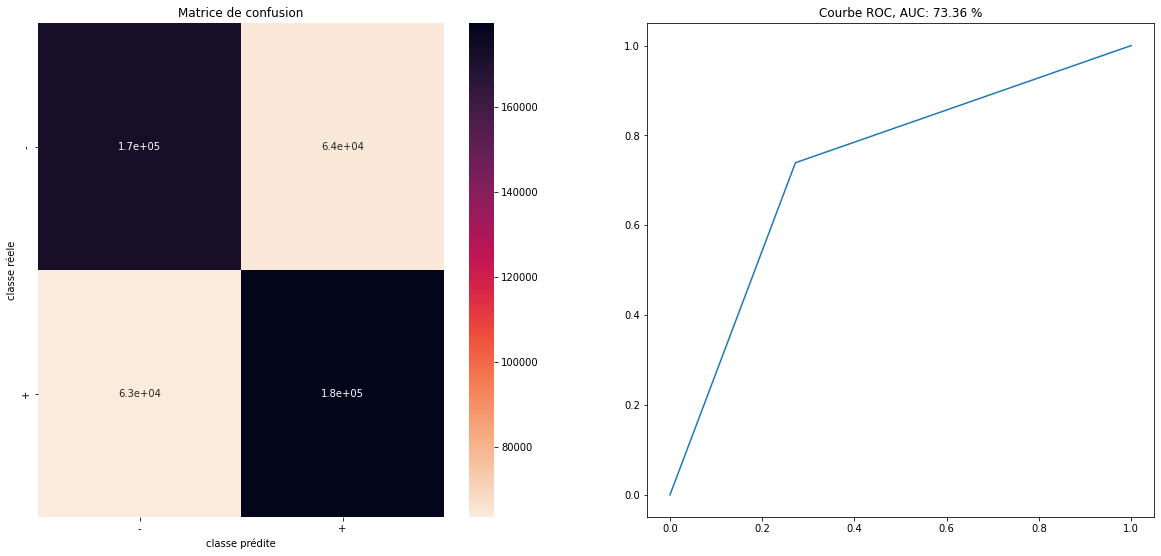

Model results: 

  - Accuracy:73.37 %
  - Precision:73.6 %
  - Recall:73.92 %
  - F1 score:73.76 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_test.index).astype('int')
analyse_results(y_test, y_pred[0])

In [ ]:
model.predict(X_test)

array([0.78817851, 0.01407635, 0.41309888, ..., 0.4393727 , 0.4819268 ,
       0.35776491])

In [ ]:
res= pd.DataFrame(y_test)

In [ ]:
res['pred']= model.predict(X_test)

In [ ]:
res['pred_bi']= res['pred'].apply(lambda x: 0 if x<0.5 else 1)

In [ ]:
drop_list= []
for e in res.index:
  if res.loc[e, 'target'] != res.loc[e, 'pred_bi']:
    drop_list.append(e)
  else:
    pass
len(drop_list)

127841

In [ ]:
X_final= X_test.drop(drop_list)
y_final= y_test.drop(drop_list)

In [ ]:
y_final

id
262570    1
207212    0
99242     0
243446    1
533555    0
         ..
591453    0
290629    0
409879    1
457632    1
295883    0
Name: target, Length: 352159, dtype: int64

In [ ]:
len(y_final)

352159

In [ ]:
res.drop(drop_list,inplace=True)

In [ ]:
res.sort_values(by='pred', ascending=False)

,target,pred,pred_bi
id,,,
385119,1,1.931929,1
266275,1,1.893715,1
264185,1,1.834715,1
298439,1,1.777057,1
360997,1,1.765625,1
...,...,...,...
55571,0,-0.384504,0
29789,0,-0.396514,0
310222,0,-0.400222,0


In [ ]:
model =  LinearRegression()
model.fit(X_final,y_final)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

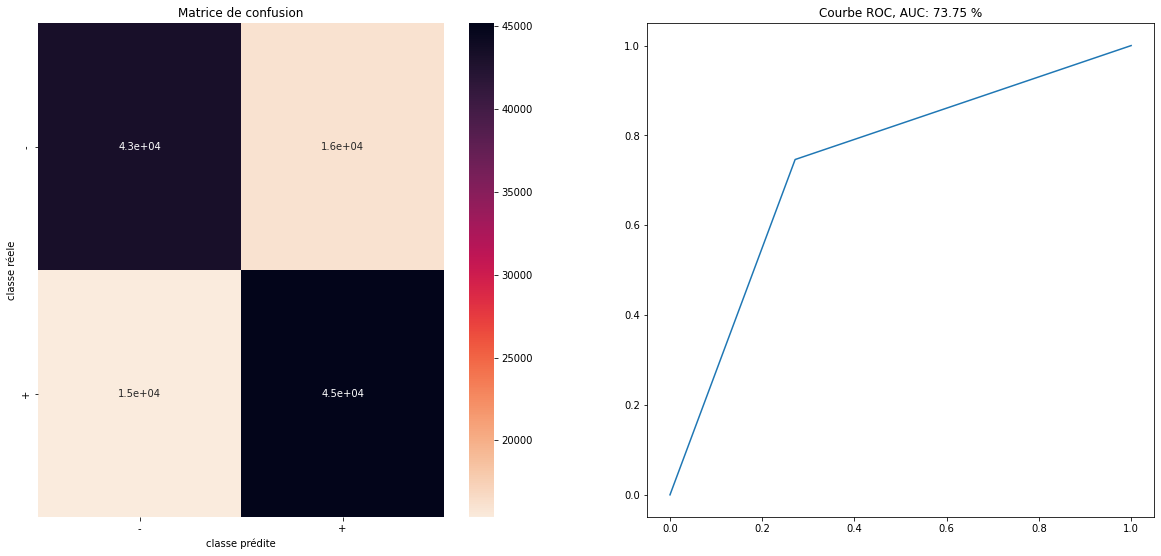

Model results: 

  - Accuracy:73.76 %
  - Precision:73.7 %
  - Recall:74.64 %
  - F1 score:74.16 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_train))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_train.index).astype('int')
analyse_results(y_train, y_pred[0])

## Regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

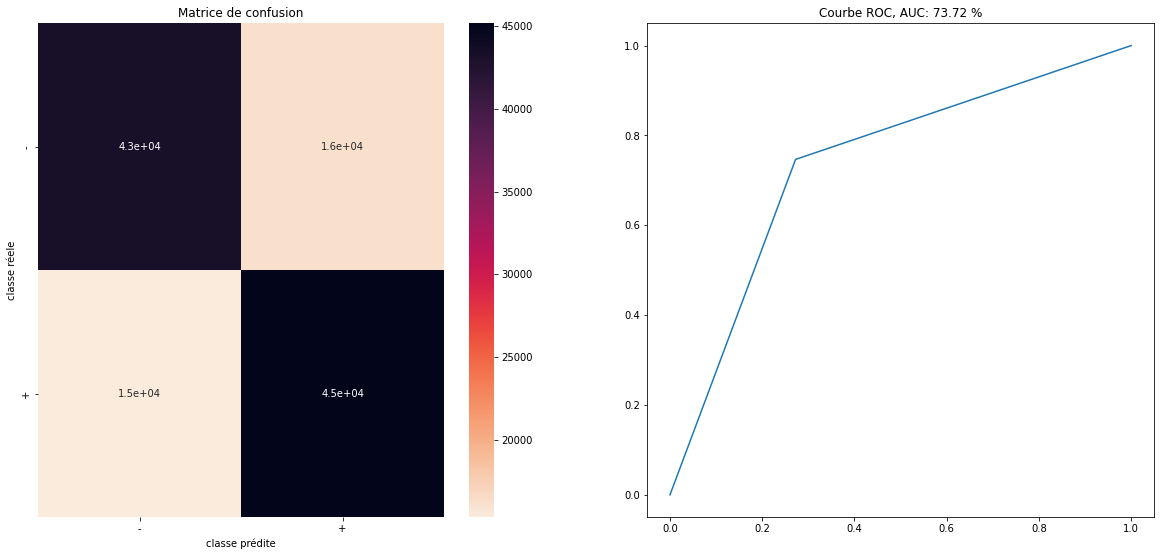

Model results: 

  - Accuracy:73.72 %
  - Precision:73.61 %
  - Recall:74.66 %
  - F1 score:74.13 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_test.index).astype('int')
analyse_results(y_test['target'], y_pred[0])

## Deep Learning - Amélioration et modèle final

Etant donné que le DL est le modèle nous donnant les meilleures performances, nous allons tester un modèle plus profond afin de tendre vers 0.75 d'AUC.

Pour ce faire nous allons tester le modèle de MARCIN PIETRZYCKI - https://www.kaggle.com/jmcslk/tps-nov-21-dnn-cnn-model-extras#Feature-Engineering

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import regularizers
from keras import metrics

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(8)
np.random.seed(8)

In [ ]:
def dnn_model():
    x_input = layers.Input(shape=(100,))
    
    x1 = layers.Dense(units=386, activation='swish')(x_input)
    x1 = layers.BatchNormalization()(x1)
    x2 = layers.Dropout(rate=0.45)(x1)
    
    x2 = layers.Dense(units=192, activation='swish')(x2)
    x2 = layers.BatchNormalization()(x2)
    x3 = layers.Dropout(rate=0.35)(x2)
    
    x3 = layers.Dense(units=98, activation='swish')(x3)
    x3 = layers.BatchNormalization()(x3)
    x3 = layers.Dropout(rate=0.25)(x3)
    
    x4 = layers.Dense(units=192, activation='swish')(x3)
    x4 = layers.BatchNormalization()(x4)
    x4 = layers.Multiply()([x2, x4])
    x4 = layers.Dropout(rate=0.35)(x4)
    
    x5 = layers.Dense(units=386, activation='swish')(x4)
    x5 = layers.BatchNormalization()(x5)
    x5 = layers.Multiply()([x1, x5])
    x5 = layers.Dropout(rate=0.45)(x5)
    
    x_e1 = layers.Concatenate()([x3, x5])
    x = layers.Reshape((22, 22, 1))(x_e1)
    
    x = layers.Conv2D(16, kernel_size=(3, 3), padding='same', activation='swish')(x)#16
    x = layers.AveragePooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='swish')(x)#8
    x = layers.AveragePooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(8, kernel_size=(3, 3), padding='same', activation='swish')(x)#8
    
    enc = layers.AveragePooling2D((2, 2), padding='same')(x)
    
    flat = layers.Flatten()(enc)
    
    x = layers.Concatenate()([x_e1, flat])
    
    x = layers.Dense(units=128, activation='swish')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(rate=0.25)(x)
    
    x_output = layers.Dense(units=1, activation='sigmoid')(x)

    model = models.Model(inputs=x_input, outputs=x_output, 
                  name='DNN_Model')
    return model

In [ ]:
model = dnn_model()
model.summary()

Model: "DNN_Model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 386)          38986       ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 386)         1544        ['dense[0][0]']                  
 alization)                                                                                       
                                                                                                  
 dropout (Dropout)              (None, 386)          0           ['batch_normalization[0][

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer= Adam(learning_rate= 0.1), 
                      loss="binary_crossentropy", 
                      metrics='accuracy')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    'baseline_model.h5',
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='auto',
    save_weights_only=False,
    period=1
)

earlystop = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.001,
    patience=30,
    verbose=1,
    mode='auto',
    restore_best_weights= True
)

csvlogger = CSVLogger(
    filename= "training_csv.log",
    separator = ",",
    append = False
)

reduceLR = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    verbose=1, 
    mode='auto'
)

callbacks = [checkpoint, earlystop, csvlogger,reduceLR]

In [ ]:
validation_split=10000
x_validation=X_train[:validation_split]
x_partial_train=X_train[validation_split:]
y_validation=y_train[:validation_split]
y_partial_train=y_train[validation_split:]

In [ ]:
nb_train_samples= len(x_partial_train)
nb_valid_samples= len(x_validation)
batch_size= 2048

model.fit(x_partial_train,y_partial_train,
          epochs= 400,
          steps_per_epoch = nb_train_samples//batch_size,
          batch_size= batch_size,
          validation_data=(x_validation,y_validation),
          validation_steps = nb_valid_samples//batch_size,
          verbose = 1,
          callbacks = callbacks,
          shuffle = True)

Epoch 1/400
229/229 [==============================] - ETA: 0s - loss: 0.5565 - accuracy: 0.7479
Epoch 00001: val_accuracy improved from -inf to 0.75256, saving model to baseline_model.h5
229/229 [==============================] - 5s 21ms/step - loss: 0.5565 - accuracy: 0.7479 - val_loss: 0.5512 - val_accuracy: 0.7526 - lr: 1.0000e-03
Epoch 2/400
  1/229 [..............................] - ETA: 3s - loss: 0.5595 - accuracy: 0.7490

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


229/229 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.7478
Epoch 00002: val_accuracy improved from 0.75256 to 0.75293, saving model to baseline_model.h5
229/229 [==============================] - 5s 20ms/step - loss: 0.5566 - accuracy: 0.7478 - val_loss: 0.5521 - val_accuracy: 0.7529 - lr: 1.0000e-03
Epoch 3/400
229/229 [==============================] - ETA: 0s - loss: 0.5564 - accuracy: 0.7477
Epoch 00003: val_accuracy did not improve from 0.75293
229/229 [==============================] - 5s 20ms/step - loss: 0.5564 - accuracy: 0.7477 - val_loss: 0.5528 - val_accuracy: 0.7524 - lr: 1.0000e-03
Epoch 4/400
229/229 [==============================] - ETA: 0s - loss: 0.5561 - accuracy: 0.7480
Epoch 00004: val_accuracy did not improve from 0.75293
229/229 [==============================] - 5s 20ms/step - loss: 0.5561 - accuracy: 0.7480 - val_loss: 0.5504 - val_accuracy: 0.7524 - lr: 1.0000e-03
Epoch 5/400
228/229 [============================>.] - ETA: 0s - loss:

In [ ]:
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))

15000/15000 [==============================] - 59s 4ms/step - loss: 0.5544 - accuracy: 0.7496
score on train: 0.7496291399002075
3750/3750 [==============================] - 15s 4ms/step - loss: 0.5759 - accuracy: 0.7463
score on test: 0.7463250160217285


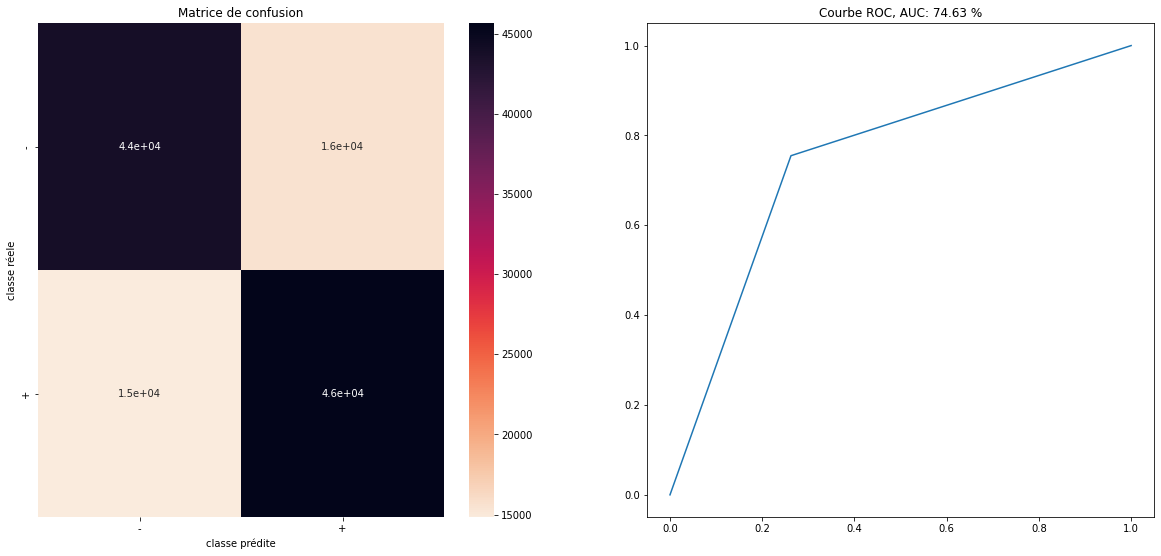

Model results: 

  - Accuracy:74.63 %
  - Precision:74.53 %
  - Recall:75.49 %
  - F1 score:75.01 % 



In [ ]:
y_pred= pd.DataFrame(model.predict(X_test))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
y_pred= pd.DataFrame(y_pred, index= X_test.index).astype('int')
analyse_results(y_test, y_pred[0])

# Pred submissions

In [ ]:
sample= pd.read_csv('/content/drive/MyDrive/P8/sample_submission.csv')
sample

,id,target
0,600000,0.5
1,600001,0.5
2,600002,0.5
3,600003,0.5
4,600004,0.5
...,...,...
539995,1139995,0.5
539996,1139996,0.5
539997,1139997,0.5
539998,1139998,0.5


In [ ]:
test= pd.read_csv('/content/drive/MyDrive/P8/test.csv',index_col='id')
test

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
600000,0.003229,4.838660,585.5290,2.282910,0.713180,3.907830,0.480696,1.482270,4.891810,0.056351,4.200990,3.151800,0.000349,1.851160,2.63889,0.746668,-0.004756,1.610300,4.11482,-0.077756,0.129446,0.053324,0.416789,0.445009,0.150464,5.021300,2.221390,-0.072333,-0.215874,1.56236,0.074880,0.010050,0.018582,0.067466,5.578300,3.08556,3.842470,0.011125,2.35997,0.695092,...,0.027517,0.048825,0.074626,0.041264,0.069319,4.248810,2.09195,0.695042,0.007464,-0.017882,1.883500,1.268030,0.023747,0.043071,3.174780,0.074356,0.125909,3.926430,0.046914,-0.042290,3.019250,0.089564,3.20070,0.009679,-0.099653,3.573060,4.79727,0.091985,0.773543,0.073380,0.112910,1.073550,0.122149,0.086330,0.036010,0.010619,0.290343,1.898200,0.131533,0.012047
600001,0.008602,0.505536,-100.0990,3.012670,0.027199,1.194610,5.036620,2.517440,4.553890,0.063876,0.337257,4.439690,0.013188,3.379010,3.38470,1.167400,2.246550,1.750170,2.76624,-0.058501,0.012595,0.036144,0.769057,0.017496,0.050283,0.324697,4.948640,0.124789,0.347128,1.24512,0.035822,-0.013188,0.023194,0.006444,4.983330,23.70690,8.287290,4.796230,1.79928,-0.050040,...,0.067650,0.066438,0.034258,0.606144,0.019988,-0.456704,3.37877,1.900050,0.052316,-0.050397,2.612950,3.112540,0.022305,0.108325,4.617640,0.091440,0.039368,3.035190,1.023050,-0.020578,2.771560,3.309480,5.05840,-0.003993,0.067636,0.995391,2.47165,-0.015214,0.263423,-0.021910,-0.020214,2.622340,0.123307,0.033063,0.123059,0.005771,-0.392923,3.689640,0.047418,0.120015
600002,1.461000,2.437260,-112.9640,3.541230,0.752338,4.338310,1.648080,4.699910,1.950250,0.005303,2.071680,0.546499,0.141781,1.673170,4.30649,1.702330,-0.062869,1.619230,4.19053,0.055140,-0.016590,0.017805,3.064810,0.070370,0.098316,3.507540,1.069100,0.012750,0.009981,3.46781,0.035920,-0.009804,0.065728,-0.004725,5.281020,11.52880,0.171694,4.394570,2.52084,0.079365,...,0.065172,-0.003328,-0.001950,0.095007,0.080267,3.337300,3.60489,4.694580,0.075650,-0.088276,1.772440,-0.142226,0.000918,0.021483,0.241844,0.067591,-0.026572,0.894909,0.111606,0.524423,1.450070,0.019355,1.27135,0.076042,0.446993,4.406990,2.44697,-0.041154,0.212414,0.141005,-0.011036,2.030180,-0.000426,0.084091,0.123605,0.499554,4.054650,3.330670,0.108843,0.064687
600003,0.140556,3.085610,179.4510,0.573945,0.057342,2.216790,1.623480,0.526174,1.542540,-0.026161,1.609440,1.723560,-0.019564,1.552130,4.83264,1.501640,0.192669,4.614890,1.47069,-0.010031,0.072805,0.048035,3.230210,-0.031548,0.028697,3.752520,4.948470,-0.174542,-0.033491,2.47823,0.068129,0.090797,0.029877,0.146718,3.169830,-12.98460,3.135210,1.765010,3.25399,0.713238,...,0.075775,-0.008900,0.141776,0.173123,0.012894,3.390590,2.69899,0.059916,0.055400,-0.000140,2.641440,0.839721,-0.026268,0.058745,2.521910,0.118737,0.134899,2.839480,0.108751,-0.015848,1.147240,0.390064,3.30923,-0.046117,-0.206052,2.373770,3.15941,0.131234,1.031180,0.026155,0.050117,0.221613,0.045298,0.129966,0.004015,0.018279,2.696580,-0.533491,0.052524,0.011058
600004,0.128876,5.199760,107.4660,-0.497149,0.080220,0.458121,0.629839,5.240460,-0.232279,0.030006,0.481359,2.176020,0.193162,1.392090,2.51890,2.993170,4.170910,0.318375,4.84563,0.085064,0.026443,-0.004559,0.120327,-0.008630,0.004495,4.921700,1.685640,0.095628,0.189131,2.56955,0.046643,0.111462,0.002912,0.060737,4.253000,38.70340,0.170825,-0.598784,3.92796,0.262956,...,0.123505,0.011181,0.152410,0.118767,-0.054951,4.841230,3.39522,3.737320,0.053328,0.143619,-0.156581,-0.257201,0.987785,0.038284,2.765120,0.040994,0.173981,1.112190,-0.030675,0.137178,1.550140,0.401083,1.74053,0.096331,0.445268,4.392460,2.52818,-0.037385,0.117148,-0.010128,0.058860,2.6604

In [ ]:
test_scaled = std_scale.transform(test)
y_pred= pd.DataFrame(model.predict(test_scaled))
y_pred= Binarizer(threshold=0.5, copy=False).fit_transform(y_pred)
pred1= pd.DataFrame(test.index.values,columns=['id'])
pred2= pd.DataFrame(y_pred, columns=['target'],dtype='int')
pred= pd.concat([pred1,pred2],axis=1)
pred

,id,target
0,600000,1
1,600001,1
2,600002,1
3,600003,0
4,600004,1
...,...,...
539995,1139995,1
539996,1139996,1
539997,1139997,1
539998,1139998,1


In [ ]:
pred.to_csv('/content/drive/MyDrive/P8/submission6.csv', index=False)